In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

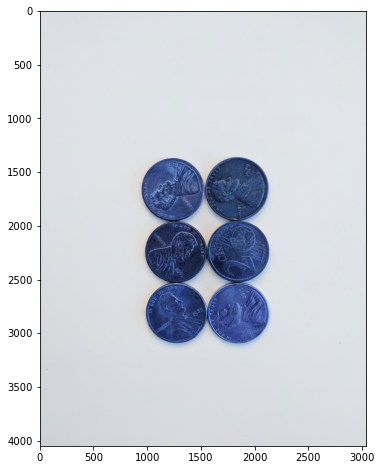

In [24]:
#sep_coins for later step

sep_coins = cv2.imread('pennies.jpg')
display(sep_coins)

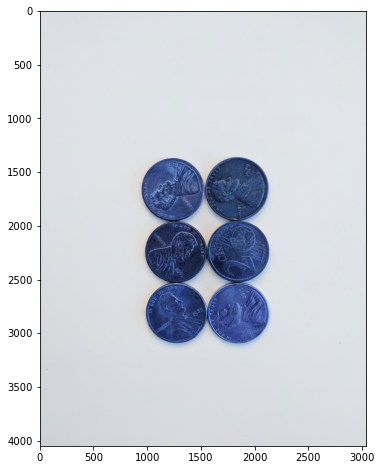

In [4]:
#read in the image 

img = cv2.imread('pennies.jpg')
display(img)

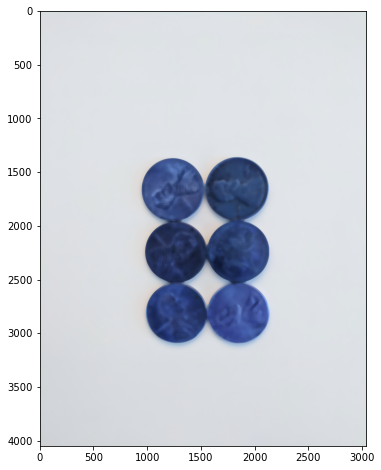

In [5]:
#apply blur. since image is big, more kernel size will be good 

img = cv2.medianBlur(img,35)
display(img)

In [7]:
#convert to greyscale 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

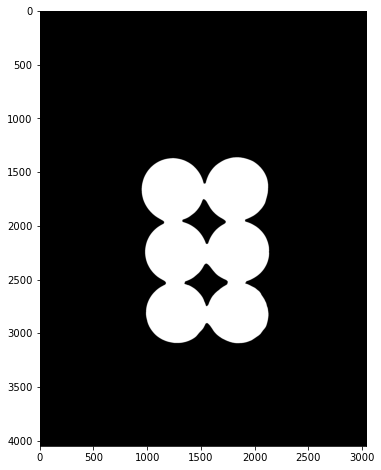

In [9]:
#Apply threshold 
#add OTSU for a more stirct threshold 

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

display(thresh, cmap='gray')

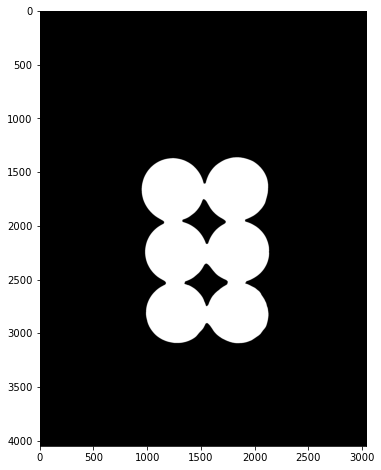

In [10]:
#removing noise from the threshold

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening, cmap='gray')

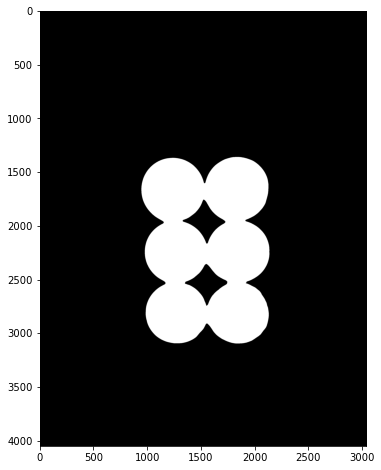

In [13]:
#grabbing the sure background area

sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg, cmap='gray')

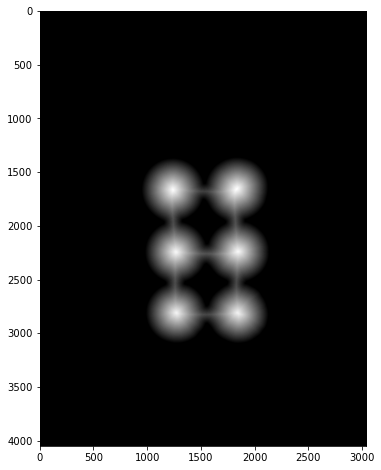

In [17]:
#grabbing sure foreground area

#using distance transforms to mark the centers of the coins

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

display(dist_transform, cmap='gray')


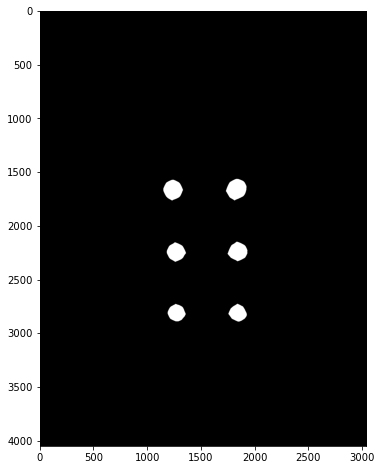

In [18]:
display(sure_fg, cmap='gray')

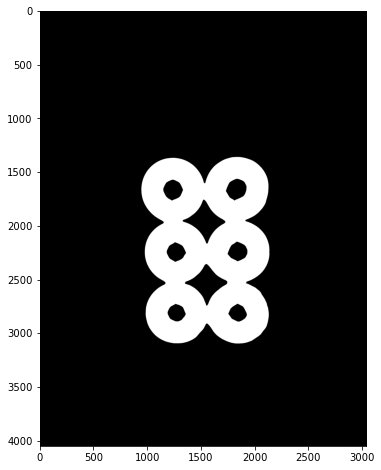

In [19]:
#if we subtract foreground from background, 
#we can get the unknown regions, where the coins stick to each other 

#Finding unknown regions 

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

display(unknown, cmap='gray')

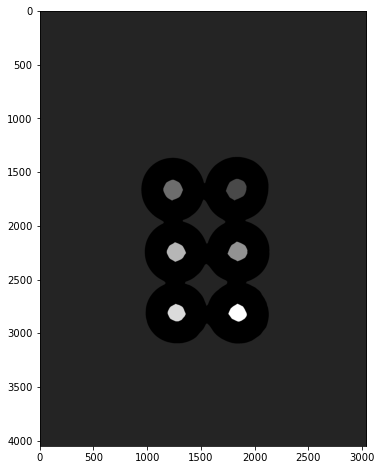

In [20]:
#label markers for the sure fg 

ret, markers = cv2.connectedComponents(sure_fg)

#make markers all 1, unknown regions all 0. 

markers = markers+1

markers[unknown==255] = 0

display(markers, cmap='gray')

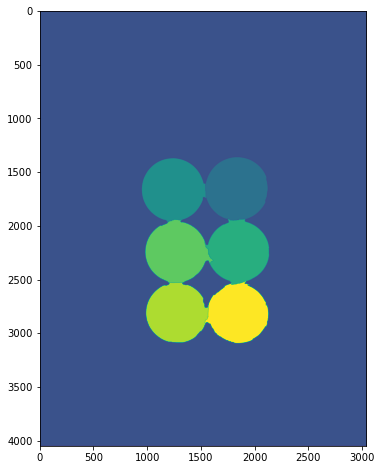

In [21]:
#applying watershed algorithm 

markers = cv2.watershed(img, markers)
display(markers)

In [25]:
#finding contours in markers after watershed has been done 

contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

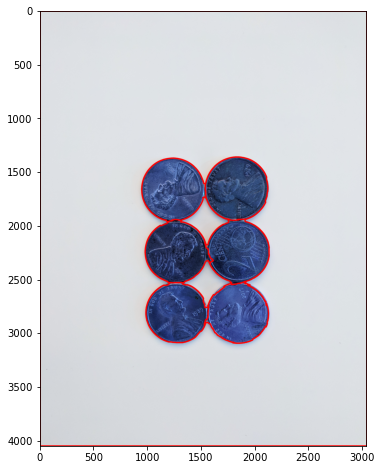

In [26]:
display(sep_coins)